# **Data Preprocessing**

In [581]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [582]:
data = pd.read_csv('titanic-passengers.csv', delimiter=';')

In [583]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [584]:
data.shape

(891, 12)

In [585]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [586]:
data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [587]:
data.isnull().sum() * 100 / len(data)

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


In [588]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


## **Handle Missing Values**

In [589]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [590]:
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [591]:
for col in data.columns:
  if data[col].dtype==object:
    data[col]=data[col].fillna(data[col].mode()[0])

In [592]:
data['Survived'] = data['Survived'].map({'Yes': 1, 'No': 0})

In [593]:
data.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


## Encoding categorical variables

In [594]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [595]:
data['Sex'] = le.fit_transform(data['Sex'])

In [596]:
data['Embarked'] = le.fit_transform(data['Embarked'])

In [597]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,1,28.0,0,0,13.0000,2
1,0,3,1,25.0,0,0,7.6500,2
2,0,3,1,20.0,0,0,7.8542,2
3,0,3,0,29.0,0,4,21.0750,2
4,0,1,1,31.0,1,0,52.0000,2
...,...,...,...,...,...,...,...,...
886,1,2,0,14.0,1,0,30.0708,0
887,0,3,1,22.0,0,0,7.2292,0
888,0,3,0,30.0,0,0,8.6625,2
889,0,3,1,28.0,0,0,7.8958,2


# **Data visualization**

In [598]:
numeric_cols = data.select_dtypes(include=np.number).columns.tolist()
numeric_cols

['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

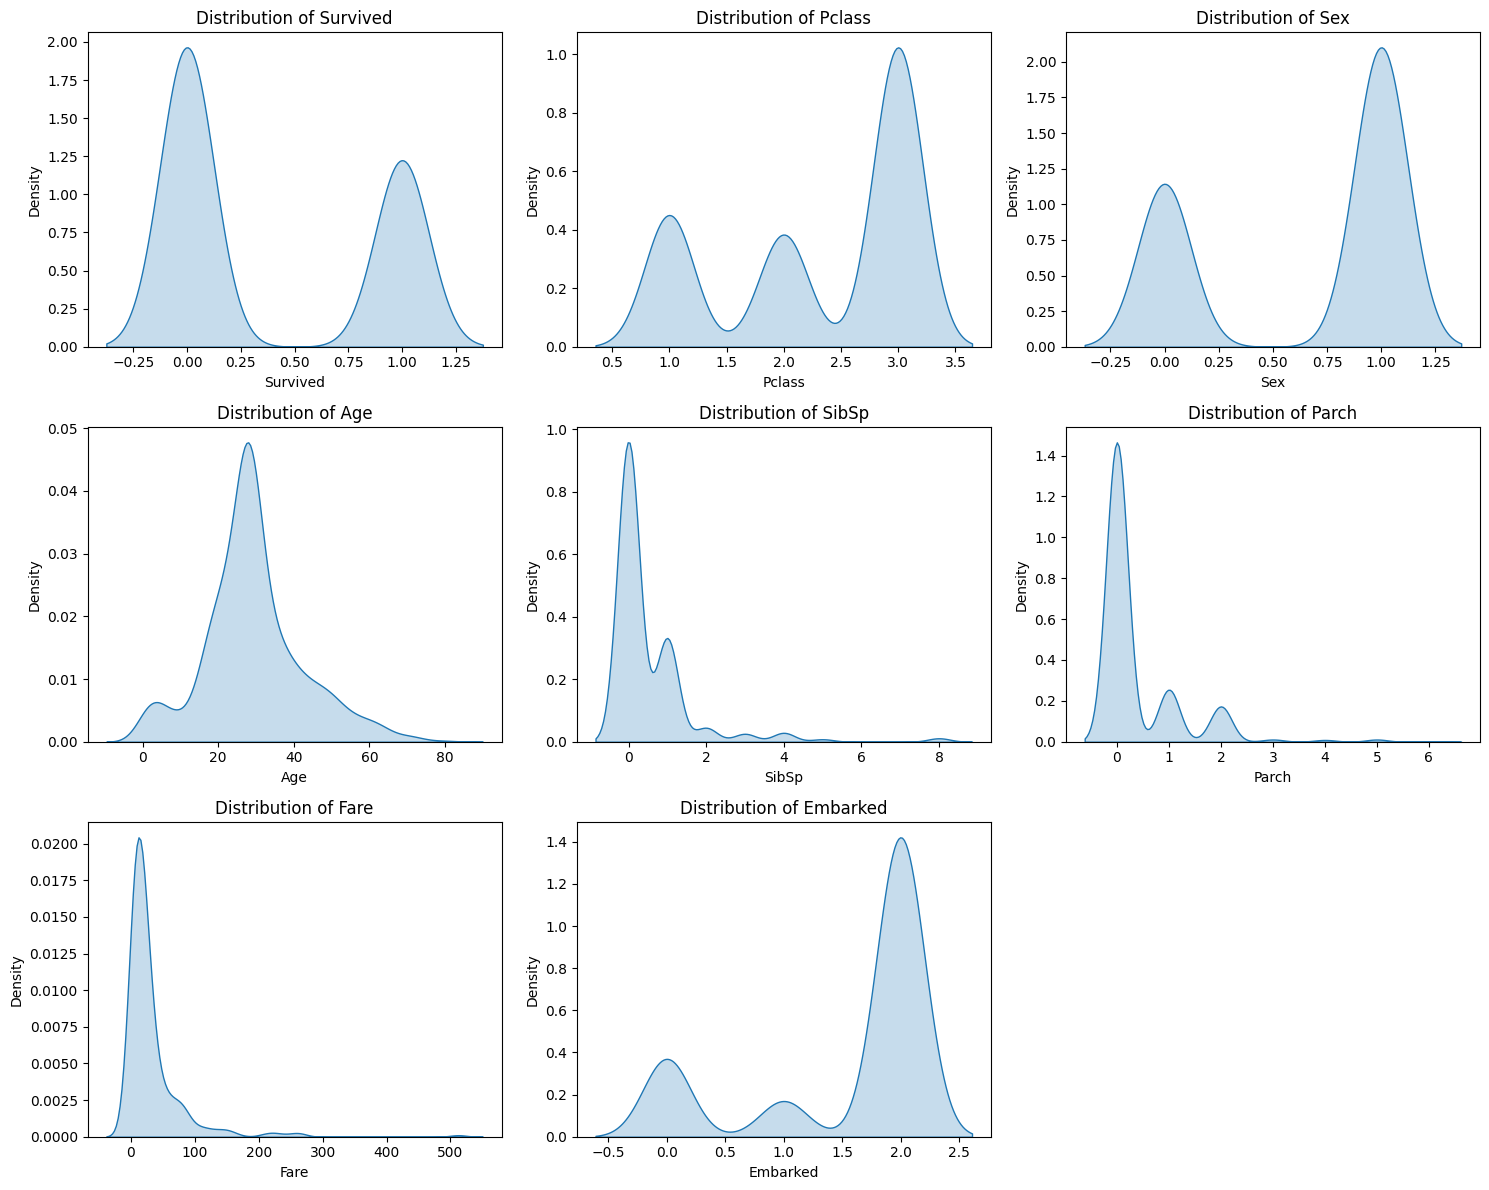

In [599]:
import math

n_features = len(numeric_cols)
n_cols = 3
n_rows = math.ceil(n_features / n_cols)

plt.figure(figsize=(15, n_rows * 4))

for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.kdeplot(data[col], fill=True)
    plt.xlabel(col)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [600]:
#Handling Outliers
out_col = ['Age', 'Fare']

In [601]:
Q1 = data[out_col].quantile(0.25)
Q3 = data[out_col].quantile(0.75)
IQR = Q3 - Q1
outliers = ((data[out_col] < (Q1 - 1.5 * IQR)) | (data[out_col] > (Q3 + 1.5 * IQR))).any(axis = 1)

In [602]:
outliers.sum()

np.int64(170)

In [603]:
outliers.sum()*100/len(data)

np.float64(19.079685746352414)

In [604]:
for col in out_col:
  data[col] = np.where(outliers,data[col].mean(),data[col])

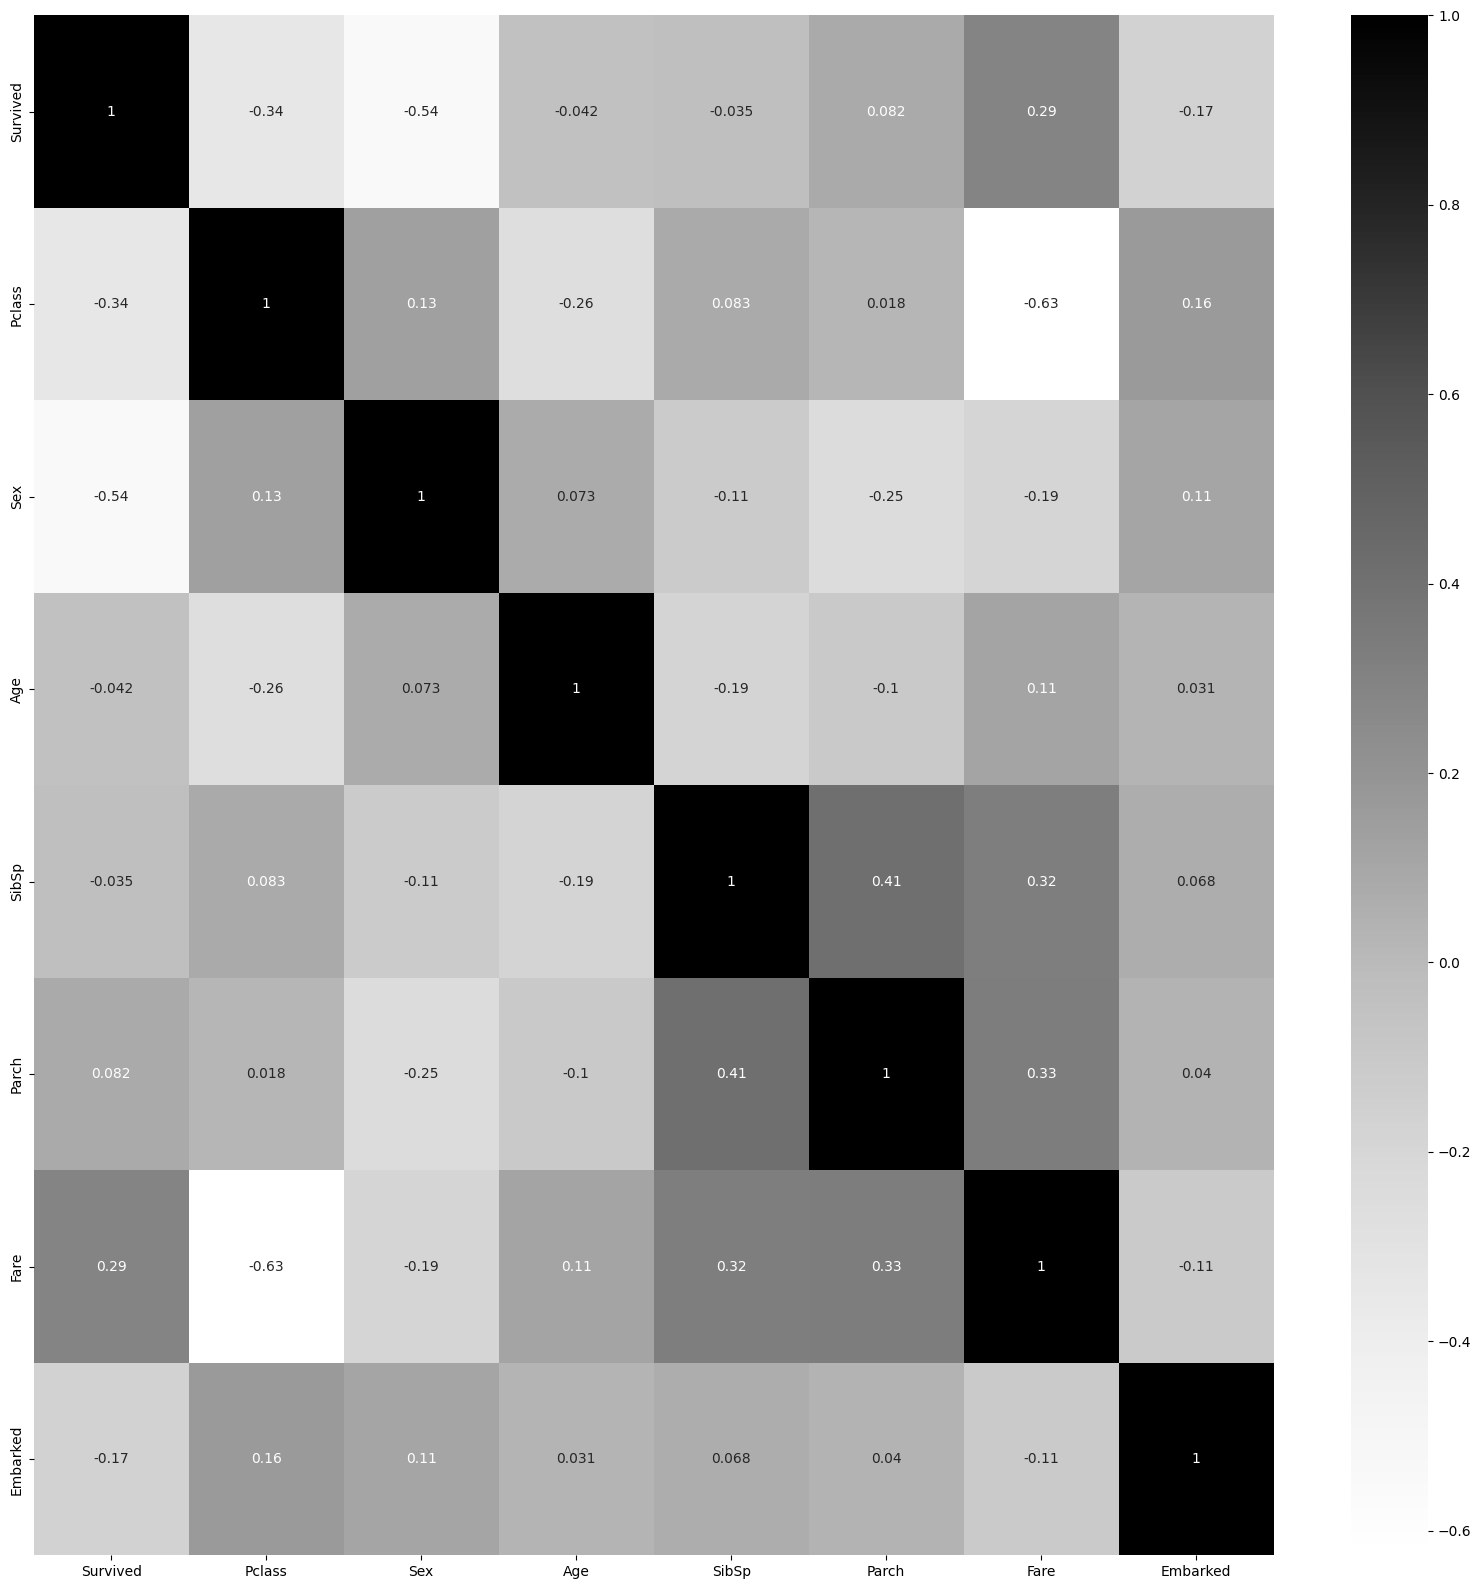

In [608]:
plt.figure(figsize=(20,20))
sns.heatmap(data[numeric_cols].corr(),annot = True,cmap = 'Greys')
plt.show()

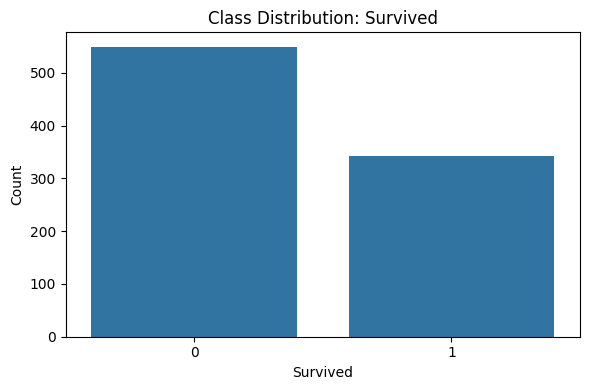

In [609]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=data)
plt.title('Class Distribution: Survived')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# **Feature Engineering**

In [610]:
categorical_columns = data.select_dtypes(include=['object']).columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

In [611]:
categorical_columns

Index([], dtype='object')

In [612]:
numerical_columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [613]:
x = data.drop('Survived', axis=1)
y = data['Survived']

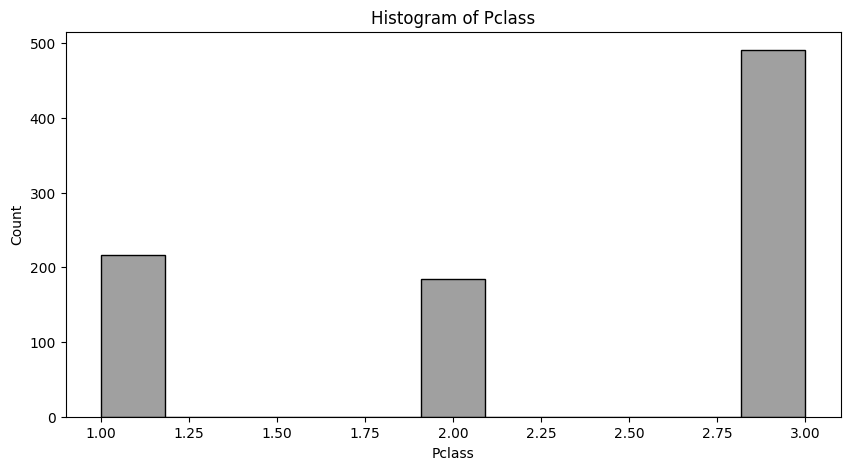

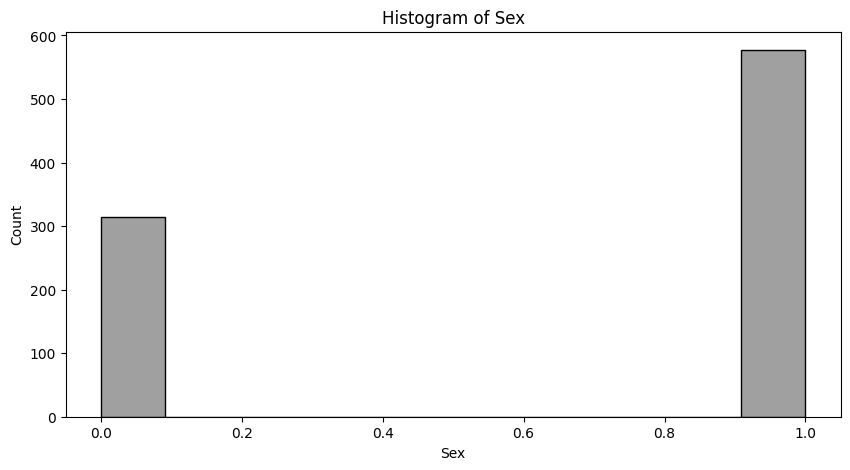

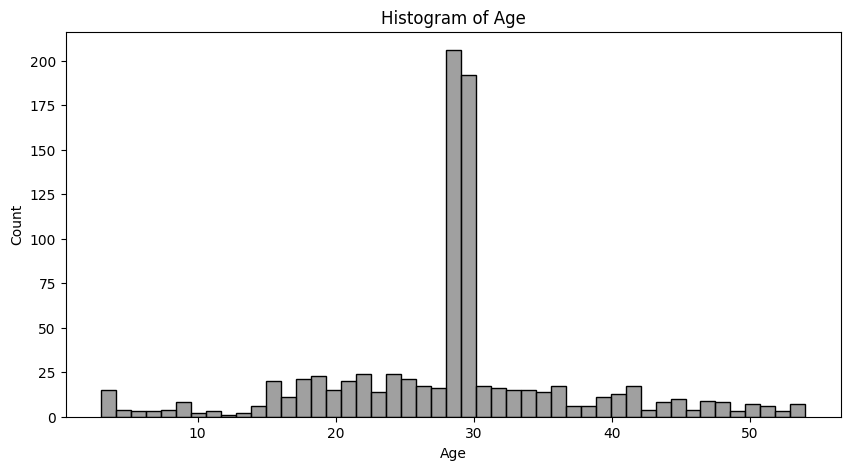

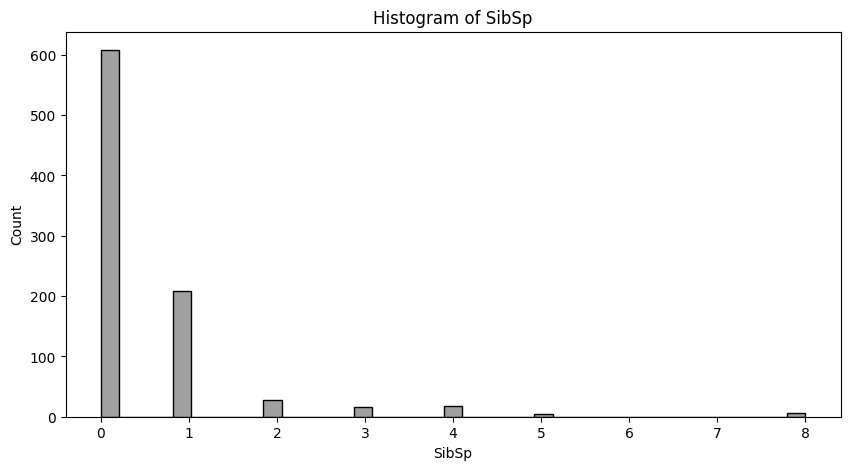

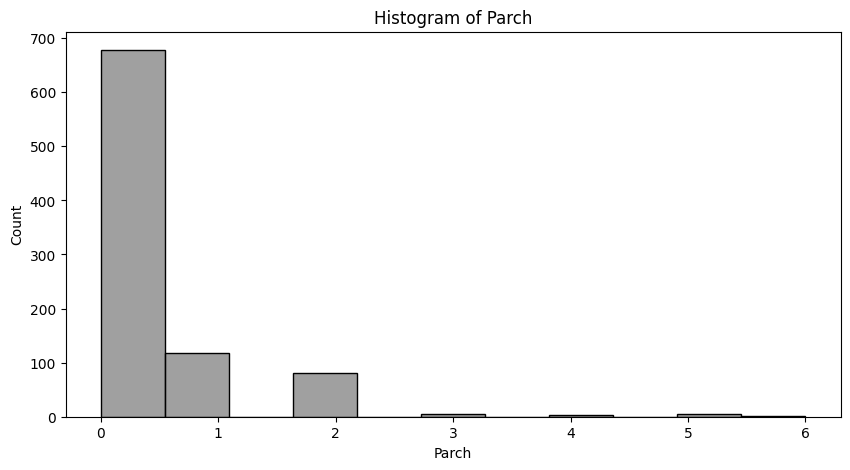

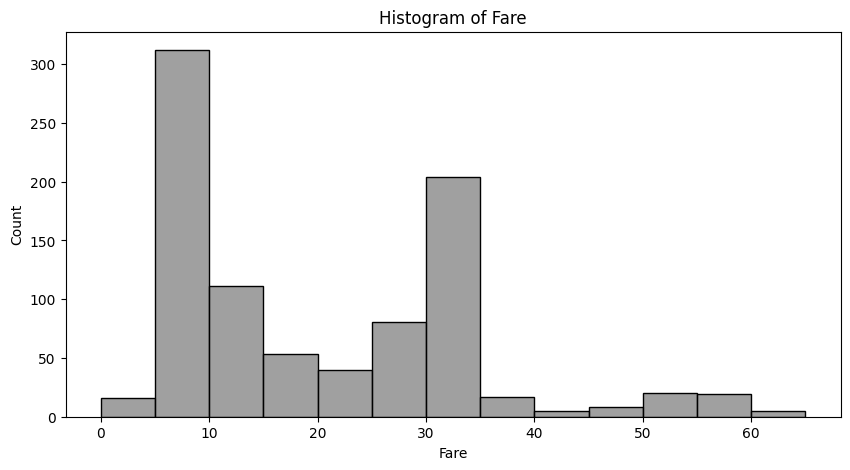

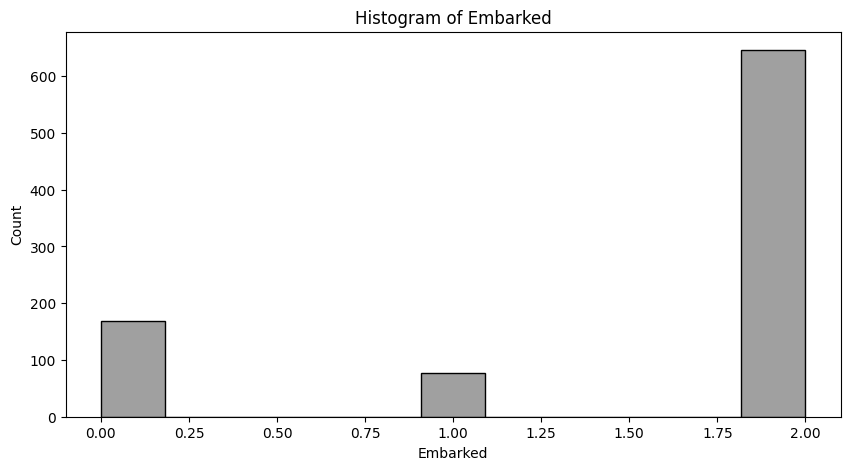

In [614]:
for column in x.columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(x[column], color='grey')
    plt.title(f"Histogram of {column}")
    plt.show()

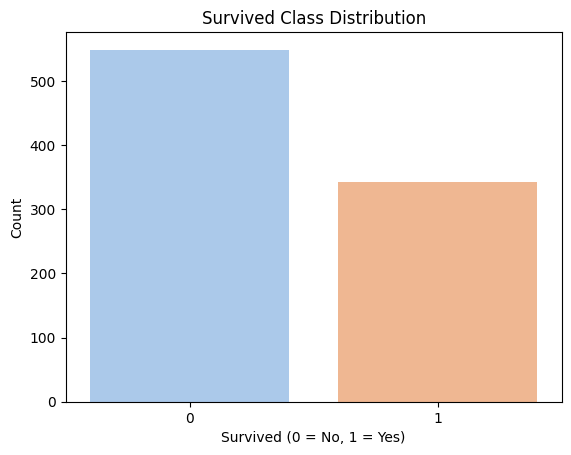

In [615]:
sns.countplot(x=data['Survived'], palette="pastel")
plt.title("Survived Class Distribution")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

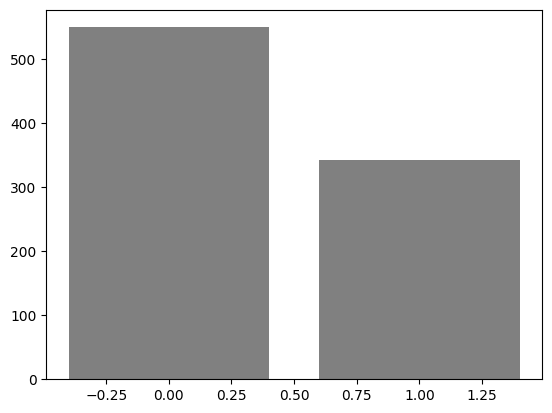

In [616]:
categories, values = np.unique(y, return_counts=True)
plt.bar(categories, values, color='grey')
plt.show()

# **Data Preparation**

In [617]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [618]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,2,1,32.000000,0,0,10.500000,2
733,3,1,20.000000,1,0,7.925000,2
382,3,0,30.500000,0,0,7.750000,1
704,1,1,29.361582,0,0,32.204208,0
813,3,0,29.000000,1,1,10.462500,2
...,...,...,...,...,...,...,...
106,3,1,28.000000,0,0,7.829200,1
270,2,1,29.361582,0,0,32.204208,2
860,3,0,29.361582,0,1,32.204208,2
435,3,1,28.000000,0,0,8.050000,2


In [619]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
709,2,1,51.0,0,0,12.5250,2
439,3,0,28.0,0,0,7.7500,1
840,3,0,25.0,0,0,7.7750,2
720,3,1,28.0,0,0,7.7375,1
39,2,0,3.0,1,2,41.5792,0
...,...,...,...,...,...,...,...
433,3,1,19.0,0,0,7.8958,2
773,3,0,28.0,0,0,7.8958,2
25,2,1,48.0,0,0,13.0000,2
84,3,1,28.0,0,0,6.9500,1


In [620]:
y_train

,Survived
331,0
733,1
382,0
704,0
813,0
...,...
106,0
270,0
860,0
435,0


In [621]:
y_test

,Survived
709,0
439,1
840,0
720,0
39,1
...,...
433,0
773,0
25,0
84,0


In [622]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [623]:
numerical_cols = x.select_dtypes(include=['float64', 'int64']).columns

In [624]:
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [625]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,0.5,1.0,0.568627,0.000,0.000000,0.161538,1.0
733,1.0,1.0,0.333333,0.125,0.000000,0.121923,1.0
382,1.0,0.0,0.539216,0.000,0.000000,0.119231,0.5
704,0.0,1.0,0.516894,0.000,0.000000,0.495449,0.0
813,1.0,0.0,0.509804,0.125,0.166667,0.160962,1.0


In [626]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
709,0.5,1.0,0.941176,0.000,0.000000,0.192692,1.0
439,1.0,0.0,0.490196,0.000,0.000000,0.119231,0.5
840,1.0,0.0,0.431373,0.000,0.000000,0.119615,1.0
720,1.0,1.0,0.490196,0.000,0.000000,0.119038,0.5
39,0.5,0.0,0.000000,0.125,0.333333,0.639680,0.0


In [627]:
data.nunique()

,0
Survived,2
Pclass,3
Sex,2
Age,64
SibSp,7
Parch,7
Fare,196
Embarked,3


# **Modeling**

## **Decision Tree Classification**

In [628]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(
    max_depth=4,
    min_samples_split=5,
    min_samples_leaf=3,
    random_state=42
)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=3, min_samples_split=5,
                       random_state=42)

In [629]:
dt.score(X_train, y_train)

0.8441011235955056

In [630]:
dt.score(X_test, y_test)

0.8212290502793296

In [631]:
y_pred_dt = dt.predict(X_test)

In [632]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       114
           1       0.85      0.62      0.71        65

    accuracy                           0.82       179
   macro avg       0.83      0.78      0.79       179
weighted avg       0.83      0.82      0.81       179



In [633]:
from sklearn.metrics import accuracy_score
print("DecisionTree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("DecisionTree Classification Report:\n", classification_report(y_test, y_pred_dt))

DecisionTree Accuracy: 0.8212290502793296
DecisionTree Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.94      0.87       114
           1       0.85      0.62      0.71        65

    accuracy                           0.82       179
   macro avg       0.83      0.78      0.79       179
weighted avg       0.83      0.82      0.81       179



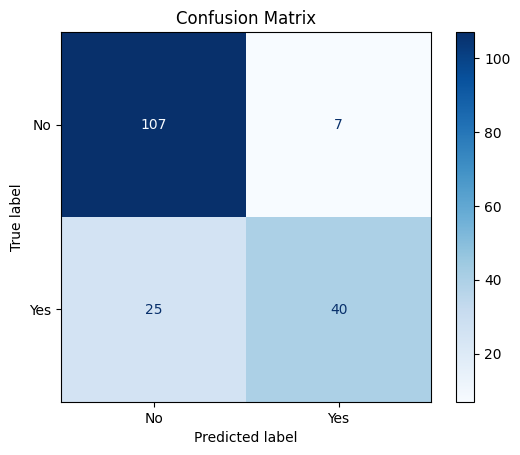

In [634]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(cm, display_labels=["No", "Yes"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

## **Random Forest Classification**

In [635]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=6,
    min_samples_split=5,
    min_samples_leaf=3,
    random_state=42
)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=3, min_samples_split=5,
                       random_state=42)

In [636]:
rf.score(X_train, y_train)

0.851123595505618

In [637]:
rf.score(X_test, y_test)

0.7932960893854749

In [638]:
y_pred_rf = rf.predict(X_test)

In [639]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85       114
           1       0.82      0.55      0.66        65

    accuracy                           0.79       179
   macro avg       0.80      0.74      0.76       179
weighted avg       0.80      0.79      0.78       179



In [640]:
from sklearn.metrics import accuracy_score
print("RandomForest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("RandomForest Classification Report:\n", classification_report(y_test, y_pred_rf))

RandomForest Accuracy: 0.7932960893854749
RandomForest Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.93      0.85       114
           1       0.82      0.55      0.66        65

    accuracy                           0.79       179
   macro avg       0.80      0.74      0.76       179
weighted avg       0.80      0.79      0.78       179



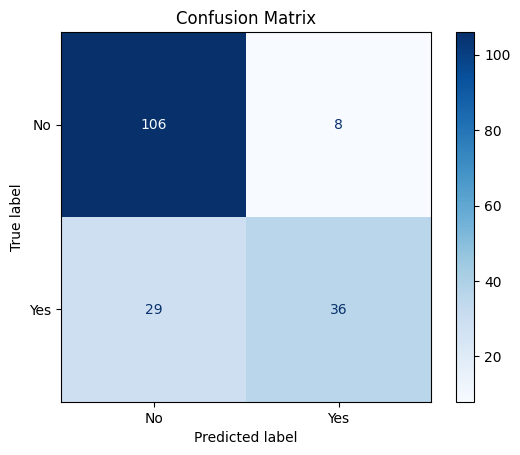

In [641]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(cm, display_labels=["No", "Yes"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

## **XGBoost Classification**

In [642]:
from xgboost import XGBClassifier
xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.9,
    colsample_bytree=0.8,
    gamma=0,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [643]:
xgb.score(X_train, y_train)

0.8735955056179775

In [644]:
xgb.score(X_test, y_test)

0.8156424581005587

In [645]:
y_pred_xgb = xgb.predict(X_test)

In [646]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       114
           1       0.81      0.65      0.72        65

    accuracy                           0.82       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.82      0.81       179



In [647]:
from sklearn.metrics import accuracy_score
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.8156424581005587
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86       114
           1       0.81      0.65      0.72        65

    accuracy                           0.82       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.82      0.81       179



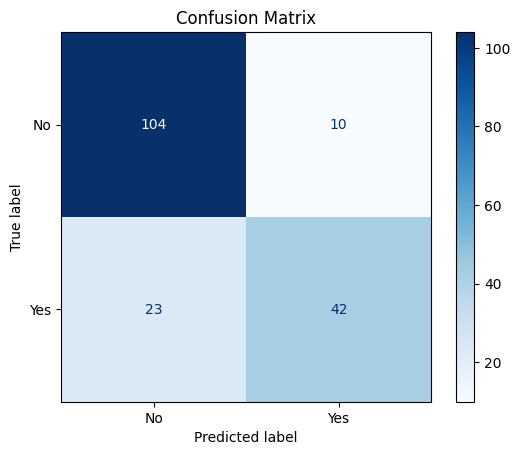

In [648]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(cm, display_labels=["No", "Yes"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

## **Model Comparison**

In [649]:
print("\nModel Comparison:")
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")


Model Comparison:
Decision Tree Accuracy: 0.8212
Random Forest Accuracy: 0.7933
XGBoost Accuracy: 0.8156
